In [3]:
#importing all the tools 
import json
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

In [4]:
#importing the data
with open ('transaction-data-adhoc-analysis.json', 'r') as f:
    tdata = json.load(f)
    
data_path = 'itmgt25/assignments/Ad Hod Analysis/Untitled.ipynb'
tdata
type(tdata)

list

In [5]:
#converting the data into a dictionary
tdict = dict(enumerate(tdata))
type(tdict)

dict

In [6]:
#creating the dataframe
df = pd.DataFrame.from_records(tdata)
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [43]:
#splitting the items into rows and getting the quantity of items purchased per transaction
split_items_df =(df.set_index(['address','birthdate','mail','name','sex','username','transaction_value','transaction_date'])
.apply(lambda x: x.str.split(';').explode())
.reset_index())

In [45]:
#I replaced the HealthKid 3+ to a shorter label temporarily so the rows will be aligned properly for when extracting the transaction quantities
split_items_df2=split_items_df.replace("HealthyKid 3+",'THREE',regex=True)

In [48]:
split_items_df2['transaction_quantity']=split_items_df2['transaction_items'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [50]:
#replacing the Healthy Kid back to its original label
splitems_df=split_items_df2.replace('THREE+','HealthyKid 3',regex=True)

In [11]:
#creating a truth table for the items purchased per transaction
splitems_df['HKYV quantity']=splitems_df['transaction_items'].str.contains('Yummy Vegetables')
splitems_df['CCOB quantity']=splitems_df['transaction_items'].str.contains('Orange Beans')
splitems_df['CCGW quantity']=splitems_df['transaction_items'].str.contains('Gummy Worms')
splitems_df['EEBC quantity']=splitems_df['transaction_items'].str.contains('Beef Chicharon')
splitems_df['EEKS quantity']=splitems_df['transaction_items'].str.contains('Kimchi and Seaweed')
splitems_df['HKNM quantity']=splitems_df['transaction_items'].str.contains('Nutrional Milk')
splitems_df['HKGV quantity']=splitems_df['transaction_items'].str.contains('Gummy Vitamins')

In [12]:
splitems_df

,address,birthdate,mail,name,sex,username,transaction_value,transaction_date,transaction_items,transaction_quantity,HKYV quantity,CCOB quantity,CCGW quantity,EEBC quantity,EEKS quantity,HKNM quantity,HKGV quantity
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)",4,False,False,False,True,False,False,False
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)",3,False,False,False,True,False,False,False
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)",4,False,False,False,False,False,True,False
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Candy City,Orange Beans,(x1)",1,False,True,False,False,False,False,False
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",3,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)",2,False,False,False,False,False,True,False
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"Candy City,Gummy Worms,(x2)",2,False,False,True,False,False,False,False
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)",1,False,False,False,False,False,True,False
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"Candy City,Gummy Worms,(x3)",3,False,False,True,False,False,False,False


In [13]:
#getting the transaction month of each purchase
numbered_months = splitems_df["transaction_month"] = [x[7][6] for x in np.array(splitems_df)]

def spell_month(numbered_months):
    if numbered_months == '1':
        return 'January'
    elif numbered_months == '2':
        return 'February'
    elif numbered_months == '3':
        return 'March'
    elif numbered_months == '4':
        return 'April'
    elif numbered_months == '5':
        return 'May'
    else:
        return 'June'

splitems_df['transaction_month'] = splitems_df['transaction_month'].apply(spell_month)
splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum()

9665

In [14]:
splitems_df

,address,birthdate,mail,name,sex,username,transaction_value,transaction_date,transaction_items,transaction_quantity,HKYV quantity,CCOB quantity,CCGW quantity,EEBC quantity,EEKS quantity,HKNM quantity,HKGV quantity,transaction_month
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)",4,False,False,False,True,False,False,False,January
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)",3,False,False,False,True,False,False,False,January
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)",4,False,False,False,False,False,True,False,January
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Candy City,Orange Beans,(x1)",1,False,True,False,False,False,False,False,January
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",3,False,False,False,False,False,False,True,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)",2,False,False,False,False,False,True,False,June
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"Candy City,Gummy Worms,(x2)",2,False,False,True,False,False,False,False,June
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)",1,False,False,False,False,False,True,False,June
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"Candy City,Gummy Worms,(x3)",3,False,False,True,False,False,False,False,June


In [15]:
#hardcoding the count of each item sold per month
#wow look at all the pretty colors

EEBC_transactions = [splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum()]

EEKS_transactions = [splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum()]

HKNM_transactions = [splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum()]

HKGV_transactions = [splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum()]

HKYV_transactions = [splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum()]

CCOB_transactions = [splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum()]

CCGW_transactions = [splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum()]

print(EEBC_transactions)
print(EEKS_transactions)
print(HKNM_transactions)
print(HKGV_transactions)
print(HKYV_transactions)
print(CCOB_transactions)
print(CCGW_transactions)

[9665, 10001, 9816, 9890, 10028, 9902]
[9676, 9949, 9967, 9921, 9773, 10104]
[9727, 9691, 9876, 9786, 9881, 9767]
[9681, 9980, 10145, 9842, 9948, 9980]
[9959, 10256, 9896, 9861, 9735, 9722]
[9774, 10037, 9611, 9914, 9964, 10106]
[9559, 9996, 9986, 10043, 9801, 9934]


In [16]:
EEBC_transactions = [splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEBC quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum(),
sum(EEBC_transactions[0:6])]

EEKS_transactions = [splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['EEKS quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum(),
sum(EEKS_transactions[0:6])]

HKNM_transactions = [splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKNM quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum(),
sum(HKNM_transactions[0:6])]

HKGV_transactions = [splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKGV quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum(),
sum(HKGV_transactions[0:6])]

HKYV_transactions = [splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['HKYV quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum(),
sum(HKYV_transactions[0:6])]

CCOB_transactions = [splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCOB quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum(),
sum(CCOB_transactions[0:6])]

CCGW_transactions = [splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum(), 
splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum(),
splitems_df.loc[(splitems_df['CCGW quantity']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum(),
sum(CCGW_transactions[0:6])]

print(EEBC_transactions)
print(EEKS_transactions)
print(HKNM_transactions)
print(HKGV_transactions)
print(HKYV_transactions)
print(CCOB_transactions)
print(CCGW_transactions)

[9665, 10001, 9816, 9890, 10028, 9902, 59302]
[9676, 9949, 9967, 9921, 9773, 10104, 59390]
[9727, 9691, 9876, 9786, 9881, 9767, 58728]
[9681, 9980, 10145, 9842, 9948, 9980, 59576]
[9959, 10256, 9896, 9861, 9735, 9722, 59429]
[9774, 10037, 9611, 9914, 9964, 10106, 59406]
[9559, 9996, 9986, 10043, 9801, 9934, 59319]


In [17]:
monthly_transactions_df = pd.DataFrame(
    {'EEBC_SQ': EEBC_transactions,
     'EEKS_SQ': EEKS_transactions,
     'HKNM_SQ': HKNM_transactions,
     'HKGV_SQ': HKGV_transactions,
     'HKYV_SQ': HKYV_transactions,
     'CCOB_SQ': CCOB_transactions,
     'CCGW_SQ': CCGW_transactions,
    }, index = pd.Index(['January', 'February', 'March', 'April', 'May', 'June', 'Total']))

In [18]:
monthly_transactions_df

,EEBC_SQ,EEKS_SQ,HKNM_SQ,HKGV_SQ,HKYV_SQ,CCOB_SQ,CCGW_SQ
January,9665,9676,9727,9681,9959,9774,9559
February,10001,9949,9691,9980,10256,10037,9996
March,9816,9967,9876,10145,9896,9611,9986
April,9890,9921,9786,9842,9861,9914,10043
May,10028,9773,9881,9948,9735,9964,9801
June,9902,10104,9767,9980,9722,10106,9934
Total,59302,59390,58728,59576,59429,59406,59319


In [19]:
#getting EEBC's Price
EEBC_Price = int(df['transaction_value'][0] / 4)
EEBC_Price

1299

In [20]:
#getting EEKS's Price
EEKS_Price = int(df['transaction_value'][6] / 4)
EEKS_Price

799

In [21]:
#getting HKNM's Price
HKNM_Price = int(df['transaction_value'][18] / 3)
HKNM_Price

1990

In [22]:
#getting HKGV's Price
HKGV_Price = int(df['transaction_value'][11] / 2)
HKGV_Price

1500

In [23]:
#getting HKYV's Price
HKYV_Price = int(df['transaction_value'][3])
HKYV_Price

500

In [24]:
#getting CCOB's Price
CCOB_Price = int(df['transaction_value'][19] / 3)
CCOB_Price

199

In [25]:
#getting CCGW's Price
CCGW_Price = int(df['transaction_value'][8])
CCGW_Price

150

In [26]:
# breakdown of the total sales of each item per month
EEBC_SQ = monthly_transactions_df['EEBC_SV'] = [x[0] for x in np.array(monthly_transactions_df)]

def get_EEBC_revenue(EEBC_SQ):
    if EEBC_SQ != 0:
        return EEBC_Price * EEBC_SQ
    else:
        return 0 

monthly_transactions_df['EEBC_SV'] = monthly_transactions_df['EEBC_SV'].apply(get_EEBC_revenue)


EEKS_SQ = monthly_transactions_df['EEKS_SV'] = [x[1] for x in np.array(monthly_transactions_df)]

def get_EEKS_revenue(EEKS_SQ):
    if EEKS_SQ != 0:
        return EEKS_Price * EEKS_SQ
    else:
        return 0 

monthly_transactions_df['EEKS_SV'] = monthly_transactions_df['EEKS_SV'].apply(get_EEKS_revenue)


HKNM_SQ = monthly_transactions_df['HKNM_SV'] = [x[2] for x in np.array(monthly_transactions_df)]

def get_HKNM_revenue(HKNM_SQ):
    if HKNM_SQ != 0:
        return HKNM_Price * HKNM_SQ
    else:
        return 0 

monthly_transactions_df['HKNM_SV'] = monthly_transactions_df['HKNM_SV'].apply(get_HKNM_revenue)


HKGV_SQ = monthly_transactions_df['HKGV_SV'] = [x[3] for x in np.array(monthly_transactions_df)]

def get_HKGV_revenue(HKGV_SQ):
    if HKGV_SQ != 0:
        return HKGV_Price * HKGV_SQ
    else:
        return 0 

monthly_transactions_df['HKGV_SV'] = monthly_transactions_df['HKGV_SV'].apply(get_HKGV_revenue)


HKYV_SQ = monthly_transactions_df['HKYV_SV'] = [x[4] for x in np.array(monthly_transactions_df)]

def get_HKYV_revenue(HKYV_SQ):
    if HKYV_SQ != 0:
        return HKYV_Price * HKYV_SQ
    else:
        return 0 

monthly_transactions_df['HKYV_SV'] = monthly_transactions_df['HKYV_SV'].apply(get_HKYV_revenue)


CCOB_SQ = monthly_transactions_df['CCOB_SV'] = [x[5] for x in np.array(monthly_transactions_df)]

def get_CCOB_revenue(CCOB_SQ):
    if CCOB_SQ != 0:
        return CCOB_Price * CCOB_SQ
    else:
        return 0 

monthly_transactions_df['CCOB_SV'] = monthly_transactions_df['CCOB_SV'].apply(get_CCOB_revenue)


CCGW_SQ = monthly_transactions_df['CCGW_SV'] = [x[6] for x in np.array(monthly_transactions_df)]

def get_CCGW_revenue(CCGW_SQ):
    if CCGW_SQ != 0:
        return CCGW_Price * CCGW_SQ
    else:
        return 0 

monthly_transactions_df['CCGW_SV'] = monthly_transactions_df['CCGW_SV'].apply(get_CCGW_revenue)

In [ ]:
#tadah!
monthly_transactions_df

,EEBC_SQ,EEKS_SQ,HKNM_SQ,HKGV_SQ,HKYV_SQ,CCOB_SQ,CCGW_SQ,EEBC_SV,EEKS_SV,HKNM_SV,HKGV_SV,HKYV_SV,CCOB_SV,CCGW_SV
January,9665,9676,9727,9681,9959,9774,9559,12554835,7731124,19356730,14521500,4979500,1945026,1433850
February,10001,9949,9691,9980,10256,10037,9996,12991299,7949251,19285090,14970000,5128000,1997363,1499400
March,9816,9967,9876,10145,9896,9611,9986,12750984,7963633,19653240,15217500,4948000,1912589,1497900
April,9890,9921,9786,9842,9861,9914,10043,12847110,7926879,19474140,14763000,4930500,1972886,1506450
May,10028,9773,9881,9948,9735,9964,9801,13026372,7808627,19663190,14922000,4867500,1982836,1470150
June,9902,10104,9767,9980,9722,10106,9934,12862698,8073096,19436330,14970000,4861000,2011094,1490100
Total,59302,59390,58728,59576,59429,59406,59319,77033298,47452610,116868720,89364000,29714500,11821794,8897850


In [28]:
#getting the numerical values of each month by putting them in a list
monthslist = ['January', 'February', 'March', 'April', 'May', 'June']
monthslist_df = pd.DataFrame(monthslist)
monthslist_df

,0
0,January
1,February
2,March
3,April
4,May
5,June


In [29]:
#getting the transaction months of each customer and grouping then based on consistency
array_agg = lambda x: '/'.join(x.astype(str))
customer_df = splitems_df.groupby(['name'], as_index=False).agg({'transaction_month':array_agg})
customer_df

,name,transaction_month
0,Aaron Beasley,April/April/April/April/May/May/May/June
1,Aaron Brewer,January/January/February/February/March/April/...
2,Aaron Brown,March/March/March/March/March/April/April/Apri...
3,Aaron Coffey,January/February/February/February/March/March...
4,Aaron Davis,January/January/February/April/April/April/Apr...
...,...,...
8482,Zachary Valentine,January/January/January/February/February/Febr...
8483,Zachary Ware,January/January/January/February/February/Febr...
8484,Zachary Williams,January/January/January/January/January/Januar...
8485,Zachary Wilson,April/May/May/May/June/June/June/June


In [30]:
#creating a truth table for the transaction months
customer_df['January']=customer_df['transaction_month'].str.contains('January')
customer_df['February']=customer_df['transaction_month'].str.contains('February')
customer_df['March']=customer_df['transaction_month'].str.contains('March')
customer_df['April']=customer_df['transaction_month'].str.contains('April')
customer_df['May']=customer_df['transaction_month'].str.contains('May')
customer_df['June']=customer_df['transaction_month'].str.contains('June')
customer_df

,name,transaction_month,January,February,March,April,May,June
0,Aaron Beasley,April/April/April/April/May/May/May/June,False,False,False,True,True,True
1,Aaron Brewer,January/January/February/February/March/April/...,True,True,True,True,False,True
2,Aaron Brown,March/March/March/March/March/April/April/Apri...,False,False,True,True,True,True
3,Aaron Coffey,January/February/February/February/March/March...,True,True,True,True,True,False
4,Aaron Davis,January/January/February/April/April/April/Apr...,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...
8482,Zachary Valentine,January/January/January/February/February/Febr...,True,True,True,True,True,True
8483,Zachary Ware,January/January/January/February/February/Febr...,True,True,True,True,True,True
8484,Zachary Williams,January/January/January/January/January/Januar...,True,True,True,True,False,False
8485,Zachary Wilson,April/May/May/May/June/June/June/June,False,False,False,True,True,True


In [31]:
#converting the truth table into numeric values
user_types_df = customer_df.loc[:,monthslist[0]:monthslist[len(monthslist)-1]]
user_types_df = user_types_df*1
user_types_df

,January,February,March,April,May,June
0,0,0,0,1,1,1
1,1,1,1,1,0,1
2,0,0,1,1,1,1
3,1,1,1,1,1,0
4,1,1,0,1,1,1
...,...,...,...,...,...,...
8482,1,1,1,1,1,1
8483,1,1,1,1,1,1
8484,1,1,1,1,0,0
8485,0,0,0,1,1,1


In [32]:
#getting the names and combining them with the numeric table
Extracted_Names = customer_df['name']
user_types_df = user_types_df.join(Extracted_Names)
Extracted_Names

0           Aaron Beasley
1            Aaron Brewer
2             Aaron Brown
3            Aaron Coffey
4             Aaron Davis
              ...        
8482    Zachary Valentine
8483         Zachary Ware
8484     Zachary Williams
8485       Zachary Wilson
8486         Zachary York
Name: name, Length: 8487, dtype: object

In [33]:
user_types_df

,January,February,March,April,May,June,name
0,0,0,0,1,1,1,Aaron Beasley
1,1,1,1,1,0,1,Aaron Brewer
2,0,0,1,1,1,1,Aaron Brown
3,1,1,1,1,1,0,Aaron Coffey
4,1,1,0,1,1,1,Aaron Davis
...,...,...,...,...,...,...,...
8482,1,1,1,1,1,1,Zachary Valentine
8483,1,1,1,1,1,1,Zachary Ware
8484,1,1,1,1,0,0,Zachary Williams
8485,0,0,0,1,1,1,Zachary Wilson


In [34]:
#hardcoding the engaged transactions for january
#note: january can't have any repeaters or inactive users
January_Transactions = splitems_df.loc[splitems_df['transaction_month'] == 'January']
january_customers_full = January_Transactions['name'].tolist()
january_customers = []
for i in january_customers_full:
    if i not in january_customers:
        january_customers.append(i)
january_engaged = len(january_customers)
january_engaged

6588

In [35]:
#getting the repeater and inactive users per months
RepeatersList = []
InactiveList = []
EngagedList = []

for x, month in enumerate(monthslist):
        if x == 0:
            repeaters = 0
            inactive = 0
            engaged = january_engaged
            print(month, ":\t", repeaters, "repeaters\t", inactive, "inactive\t", engaged, "engaged")
            RepeatersList.append(repeaters)
            InactiveList.append(inactive)
            EngagedList.append(engaged)
        else:
            user_repeaters = user_types_df[(user_types_df[monthslist[x-1]] == 1) & (user_types_df[monthslist[x]] == 1)]
            repeaters = len(user_repeaters.index)

            user_inactive = user_types_df.loc[:,monthslist[0]:month]
            user_inactive = user_inactive[(user_inactive[monthslist[x]] == 0)]

            user_inactive2 = user_inactive.sum(axis=1)
            user_inactive2 = user_inactive2.tolist()
            inactive = np.count_nonzero(user_inactive2)

            user_engaged = user_types_df.loc[:, monthslist[0]:month]
            user_engaged2 = user_engaged.sum(axis=1)
            user_engaged2 = user_engaged2.tolist()
            engaged = user_engaged2.count(x+1)
            print(month, ":\t", repeaters, "repeaters\t", inactive, "inactive\t", engaged, "engaged")
            RepeatersList.append(repeaters)
            InactiveList.append(inactive)
            EngagedList.append(engaged)

January :	 0 repeaters	 0 inactive	 6588 engaged
February :	 5172 repeaters	 1416 inactive	 5172 engaged
March :	 5216 repeaters	 1747 inactive	 4126 engaged
April :	 5154 repeaters	 1909 inactive	 3289 engaged
May :	 5110 repeaters	 1917 inactive	 2667 engaged
June :	 5193 repeaters	 1835 inactive	 2190 engaged


In [36]:
data = [RepeatersList, InactiveList, EngagedList]
data

[[0, 5172, 5216, 5154, 5110, 5193],
 [0, 1416, 1747, 1909, 1917, 1835],
 [6588, 5172, 4126, 3289, 2667, 2190]]

In [37]:
#putting the data into a table
customers_table = pd.DataFrame(columns = ['January', 'February', 'March', 'April', 'May', 'June'], index = ['repeaters', 'inactive', 'engaged'], data = data)

customers_table

,January,February,March,April,May,June
repeaters,0,5172,5216,5154,5110,5193
inactive,0,1416,1747,1909,1917,1835
engaged,6588,5172,4126,3289,2667,2190


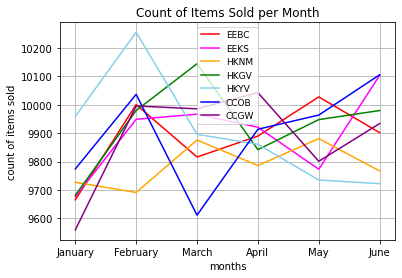

In [155]:
#creating the table for the monthly number of items sold
Months = ['January', 'February', 'March', 'April', 'May', 'June']
EEBC = [9665, 10001, 9816, 9890, 10028, 9902]
EEKS = [9676, 9949, 9967, 9921, 9773, 10104]
HKNM = [9727, 9691, 9876, 9786, 9881, 9767]
HKGV = [9681, 9980, 10145, 9842, 9948, 9980]
HKYV = [9959, 10256, 9896, 9861, 9735, 9722]
CCOB = [9774, 10037, 9611, 9914, 9964, 10106]
CCGW = [9559, 9996, 9986, 10043, 9801, 9934]
plt.plot(Months, EEBC, label = 'EEBC',  color = 'red')
plt.plot(Months, EEKS, label = 'EEKS', color = 'magenta')
plt.plot(Months, HKNM, label = 'HKNM', color = 'orange')
plt.plot(Months, HKGV, label = 'HKGV', color = 'green')
plt.plot(Months, HKYV, label = 'HKYV', color = 'skyblue')
plt.plot(Months, CCOB, label = 'CCOB', color = 'blue')
plt.plot(Months, CCGW, label = 'CCGW', color = 'purple')

plt.title('Count of Items Sold per Month')
plt.xlabel('months')
plt.ylabel('count of items sold')
plt.rc('legend', fontsize=9)
plt.legend()
plt.grid(True)
plt.savefig('items.png')
plt.show()

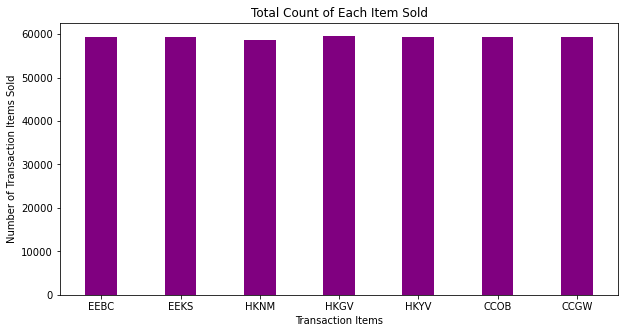

In [158]:
# creating the bar graph for total sales per transaction item
data = {'EEBC':59302, 'EEKS':59390, 'HKNM':58728, 'HKGV':59576, 'HKYV':59429, 'CCOB':59406,'CCGW':59319}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
    
plt.bar(courses, values, color ='purple', width = 0.4)
 
plt.xlabel("Transaction Items")
plt.ylabel("Number of Transaction Items Sold")
plt.title("Total Count of Each Item Sold")
plt.savefig('total_count.png')
plt.show()

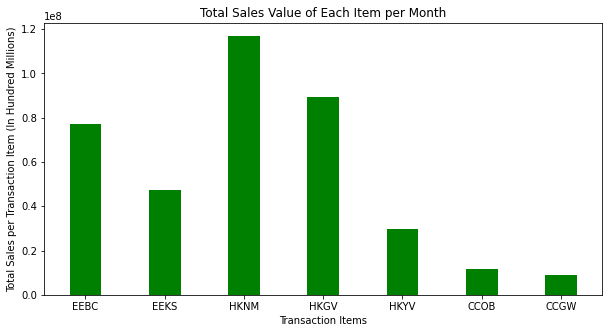

In [156]:
# creating the bar graph for total sales per transaction item
data = {'EEBC':77033298	, 'EEKS':47452610, 'HKNM':116868720, 'HKGV':89364000, 'HKYV':29714500, 'CCOB':11821794,'CCGW':8897850}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
    
plt.bar(courses, values, color ='green', width = 0.4)
 
plt.xlabel("Transaction Items")
plt.ylabel("Total Sales per Transaction Item (In Hundred Millions)")
plt.title("Total Sales Value of Each Item per Month")
plt.savefig('sales_value.png')
plt.show()

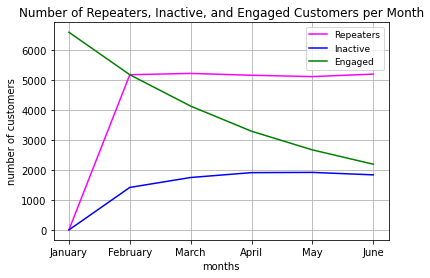

In [159]:
Months = ['January', 'February', 'March', 'April', 'May', 'June']
Repeaters = [0, 5172, 5216, 5154, 5110, 5193]
Inactive = [0, 1416, 1747, 1909, 1917, 1835]
Engaged = [6588, 5172, 4126, 3289, 2667, 2190]

plt.plot(Months, Repeaters, label = 'Repeaters',  color = 'magenta')
plt.plot(Months, Inactive, label = 'Inactive', color = 'blue')
plt.plot(Months, Engaged, label = 'Engaged', color = 'green')

plt.title('Number of Repeaters, Inactive, and Engaged Customers per Month')
plt.xlabel('months')
plt.ylabel('number of customers')
plt.rc('legend', fontsize=9)
plt.legend()
plt.grid(True)
plt.savefig('customers.png')
plt.show()